In [1]:
install.packages('randomForest')

package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\15U560\AppData\Local\Temp\RtmpuoV4zO\downloaded_packages


In [9]:
library(randomForest)
help(randomForest)

In [4]:
library(lattice)
library(ggplot2)
library(caret)

In [5]:
set.seed(1111)
N <- nrow(iris)
tr.idx <- sample(1:N, N*2/3, replace = FALSE)
train <- iris[tr.idx,]
test <- iris[-tr.idx,]

In [8]:
rf_out1 <- randomForest(Species ~., train, importance = T)
rf_out1


Call:
 randomForest(formula = Species ~ ., data = train, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 2%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         34          0         0  0.00000000
versicolor      0         31         1  0.03125000
virginica       0          1        33  0.02941176

### mtry : 여러가지 설명변수중 몇개의 변수로 모델을 구축한다. default 값은 2이다.

In [11]:
rf_out2 <- randomForest(Species ~., train, importance=T, mtry=4)
rf_out2


Call:
 randomForest(formula = Species ~ ., data = train, importance = T,      mtry = 4) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 4%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         34          0         0  0.00000000
versicolor      0         31         1  0.03125000
virginica       0          3        31  0.08823529

### 변수의 중요도 확인
    * 중요도  Petal.Width > petal.Length  두변수가 classify하는데 중요함

In [12]:
round(importance(rf_out1), 2)

,setosa,versicolor,virginica,MeanDecreaseAccuracy,MeanDecreaseGini
Sepal.Length,6.94,8.62,7.57,10.88,6.67
Sepal.Width,4.34,4.55,3.01,5.68,1.73
Petal.Length,19.90,33.41,23.70,31.53,27.95
Petal.Width,24.33,31.65,27.52,34.73,29.61


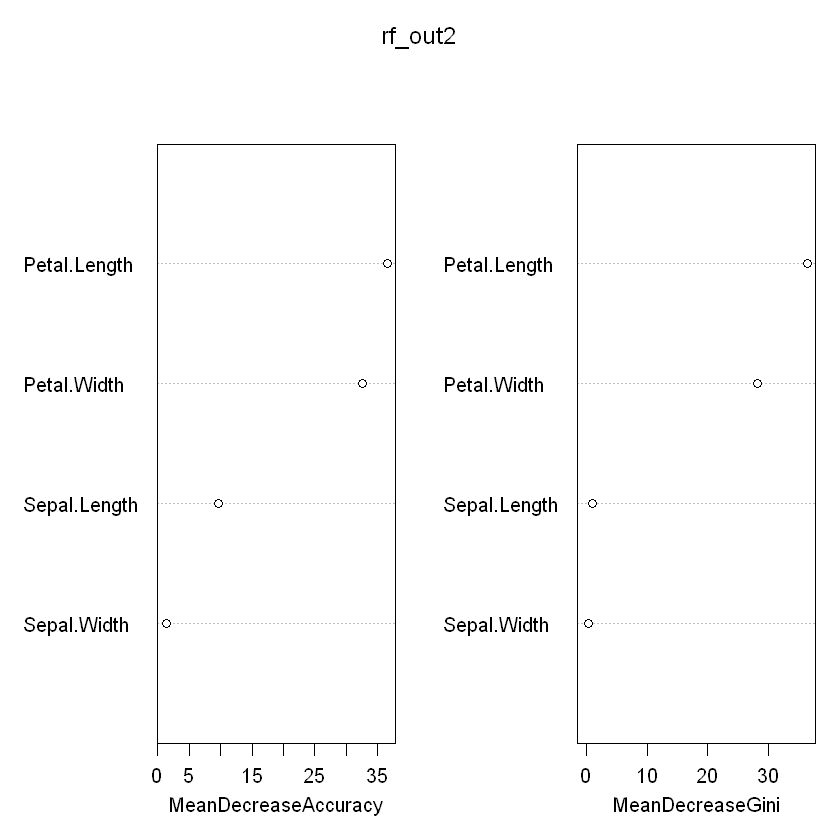

In [13]:
varImpPlot(rf_out2)

### MeanDecreaseAccuracy, MeanDecreaseGini 둘 중 하나를 기준으로 보는데 둘이 거의 비슷하다.

In [14]:
rfpred <- predict(rf_out1, test)
confusionMatrix(rfpred, test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         16          0         0
  versicolor      0         15         0
  virginica       0          3        16

Overall Statistics
                                          
               Accuracy : 0.94            
                 95% CI : (0.8345, 0.9875)
    No Information Rate : 0.36            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9102          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                   1.00            0.8333           1.0000
Specificity                   1.00            1.0000           0.9118
Pos Pred Value                1.00            1.0000           0.8421
Neg Pred Value                1.00            0.9143           1.0000
Prevalence                    0.32          

### 앞에서한 support vector machine 이나 decision tree와 별 차이가 없지만 복잡한 데이터를 사용하면 차이가 나타남